In [2]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called chipo.

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

In [3]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [4]:
# Step 4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
# Step 5. Create a histogram of the top 5 items bought

hist = chipo.groupby('item_name').quantity.sum().sort_values(ascending=False).head(5)
hist

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

Text(0.5, 1.0, '__Most Ordered Items__')

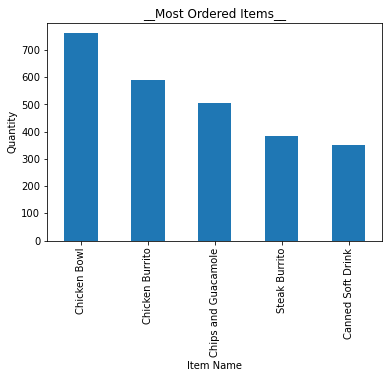

In [7]:
hist.plot(kind='bar')
plt.xlabel('Item Name')
plt.ylabel('Quantity')
plt.title('__Most Ordered Items__')

In [36]:
chipo['item_price'] = chipo['item_price'].str.replace('$','')
chipo['item_price'] = chipo['item_price'].astype(float)

C:\Users\Dell\AppData\Local\Temp/ipykernel_17244/4117676919.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$','')


item_price
1.09     106
1.25     264
1.50     117
1.69      99
1.99       1
        ... 
32.94      3
33.75      3
35.00      8
35.25      3
44.25     15
Name: quantity, Length: 78, dtype: int64


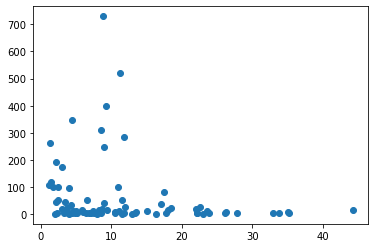

In [37]:
# Step 6. Create a scatterplot with the number of items orderered per order price
# Hint: Price should be in the X-axis and Items ordered in the Y-axis

# fig, ax = plt.subplots()
price_cnt = chipo.groupby('item_price').quantity.sum()
plt.scatter(price_cnt.index.tolist(), price_cnt.tolist())
print(price_cnt)

(0.0, 36.7)

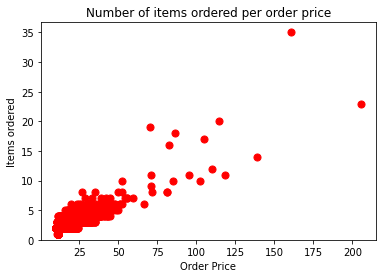

In [39]:
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'red')

# # Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

<AxesSubplot:xlabel='item_name'>

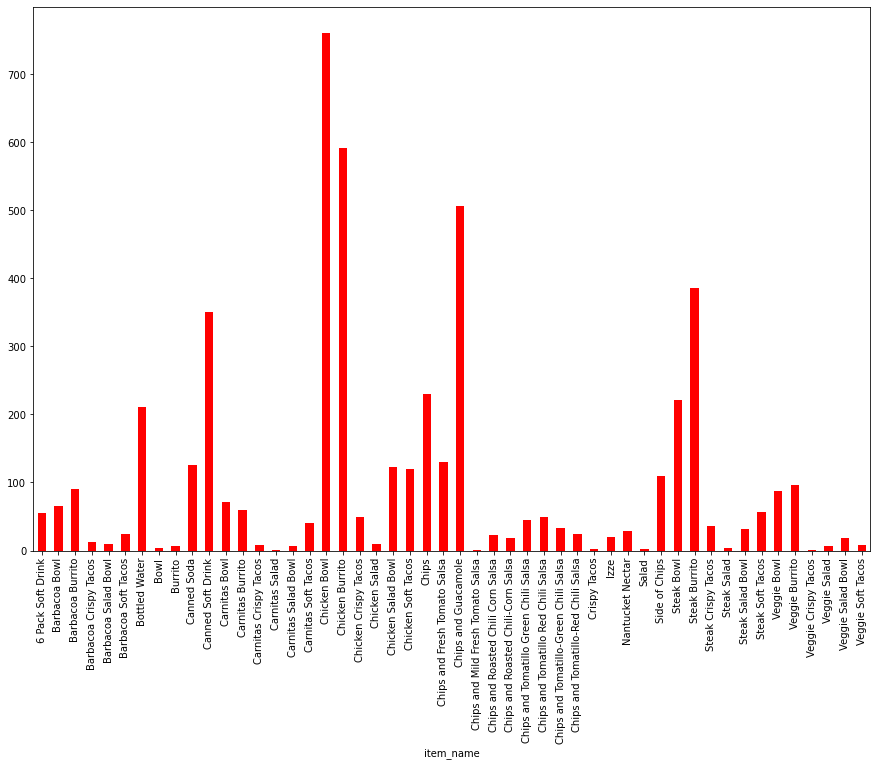

In [51]:
# Step 7. BONUS: Create a question and a graph to answer your own question.

total_item = chipo.groupby('item_name').quantity.sum()
total_item.plot(kind='bar',figsize=(15, 10),color='red')